In [4]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

## Importamos el dataset

In [5]:
path1=r'/Users/ismaelgarciainigo/Desktop/NEOLAND BOOTCAMP/PAKDD 2010/PAKDD2010_Modeling_Data.txt'

In [6]:
df=pd.read_csv(path1,delimiter='\t',engine='python',names=list(range(54)))

In [7]:
df1=pd.read_excel('/Users/ismaelgarciainigo/Desktop/NEOLAND BOOTCAMP/PAKDD 2010/PAKDD2010_VariablesList.XLS')

In [8]:
lista_col=list(df1.Var_Title)
lista_col[43]='EDUCATION_LEVEL_del'
df.columns=lista_col

## Visualización del dataframe

In [9]:
df.shape

(50000, 54)

In [10]:
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


## Previsualización en el EDA

In [7]:
def eda(df): 
    eda = {}
    eda['null_sum'] = df.isnull().sum()
    eda['null_pct'] = df.isnull().mean()
    eda['dtypes'] = df.dtypes
    eda['count'] = df.count()
   
    return pd.DataFrame(eda)

In [8]:
eda(df)

,null_sum,null_pct,dtypes,count
ID_CLIENT,0,0.00000,int64,50000
CLERK_TYPE,0,0.00000,object,50000
PAYMENT_DAY,0,0.00000,int64,50000
APPLICATION_SUBMISSION_TYPE,0,0.00000,object,50000
QUANT_ADDITIONAL_CARDS,0,0.00000,int64,50000
POSTAL_ADDRESS_TYPE,0,0.00000,int64,50000
SEX,0,0.00000,object,50000
MARITAL_STATUS,0,0.00000,int64,50000
QUANT_DEPENDANTS,0,0.00000,int64,50000
EDUCATION_LEVEL,0,0.00000,int64,50000


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["RESIDENCE_TYPE"] = imputer.fit_transform(df[["RESIDENCE_TYPE"]])
df["MONTHS_IN_RESIDENCE"] = imputer.fit_transform(df[["MONTHS_IN_RESIDENCE"]])
df["PROFESSION_CODE"] = imputer.fit_transform(df[["PROFESSION_CODE"]])
df["OCCUPATION_TYPE"] = imputer.fit_transform(df[["OCCUPATION_TYPE"]])

In [10]:
df.CITY_OF_BIRTH=df.CITY_OF_BIRTH.map(lambda x:x.upper())
df.RESIDENCIAL_CITY=df.RESIDENCIAL_CITY.map(lambda x:x.upper())
df.RESIDENCIAL_BOROUGH=df.RESIDENCIAL_BOROUGH.map(lambda x:x.upper())
df.RESIDENCIAL_BOROUGH=df.RESIDENCIAL_BOROUGH.replace({'[OLARIA':'OLARIA'})

In [11]:
df.drop(['PROFESSIONAL_CITY','PROFESSIONAL_BOROUGH','MATE_PROFESSION_CODE'],axis=1,inplace=True)
df.drop(df.columns[40],axis=1,inplace=True)
df.drop('EDUCATION_LEVEL',axis=1,inplace=True)
df.drop(df[df['STATE_OF_BIRTH']==' '].index,axis=0,inplace=True)
df.drop(df[df['SEX']==' '].index,axis=0,inplace=True)
df.drop(df[df['SEX']=='N'].index,axis=0,inplace=True)
df.drop(df[df['QUANT_DEPENDANTS']==53].index,axis=0,inplace=True)
df=df[~(df['NACIONALITY']==2)]
df.drop(df[df['CITY_OF_BIRTH']=='X X X X'].index,axis=0,inplace=True)
df.drop(df[df['RESIDENCIAL_BOROUGH']==' '].index,axis=0,inplace=True)
df.drop(df[(df['AGE']>=6) & (df['AGE']<=17)].index,axis=0,inplace=True)
lista_drop=['QUANT_ADDITIONAL_CARDS','RESIDENCIAL_PHONE_AREA_CODE','FLAG_MOBILE_PHONE','PROFESSIONAL_STATE','PROFESSIONAL_PHONE_AREA_CODE','FLAG_HOME_ADDRESS_DOCUMENT','FLAG_RG','FLAG_CPF','FLAG_INCOME_PROOF','FLAG_ACSP_RECORD']
df.drop(lista_drop,axis=1,inplace=True)
df.drop(df[df['RESIDENCIAL_ZIP_3']=='#DIV/0!'].index,axis=0,inplace=True)

In [12]:
df.shape

(47750, 39)

## Visualización de los datos

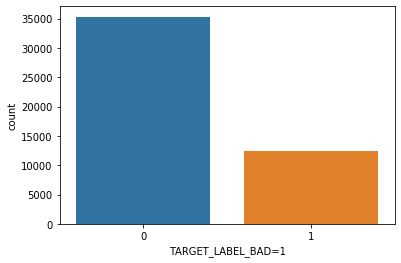

In [13]:
sns.countplot(df['TARGET_LABEL_BAD=1'])
plt.show()

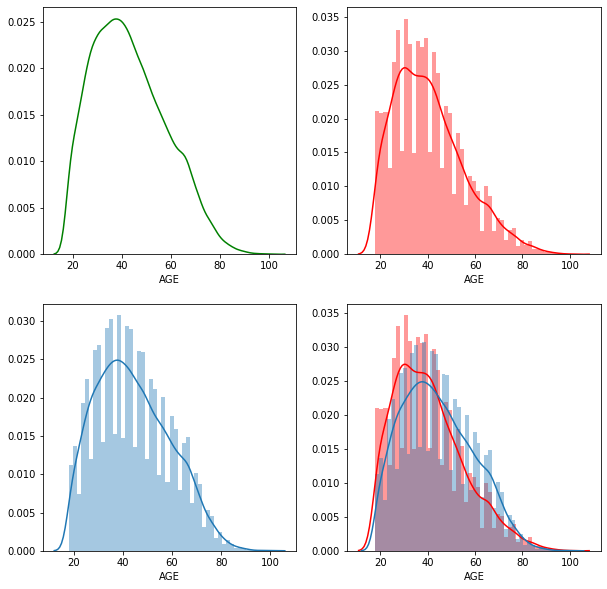

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)  
sns.distplot(df.AGE,hist=False,color='green')
plt.subplot(2,2,2)
sns.distplot(df[df['TARGET_LABEL_BAD=1']==1]['AGE'],color='red')
plt.subplot(2,2,3)  
sns.distplot(df[df['TARGET_LABEL_BAD=1']==0]['AGE'])
plt.subplot(2,2,4) 
sns.distplot(df[df['TARGET_LABEL_BAD=1']==1]['AGE'],color='red')
sns.distplot(df[df['TARGET_LABEL_BAD=1']==0]['AGE'])
plt.show()

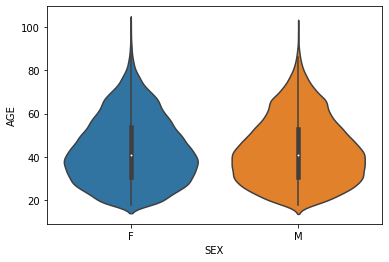

In [15]:
sns.violinplot(df.SEX ,df.AGE)
plt.show()

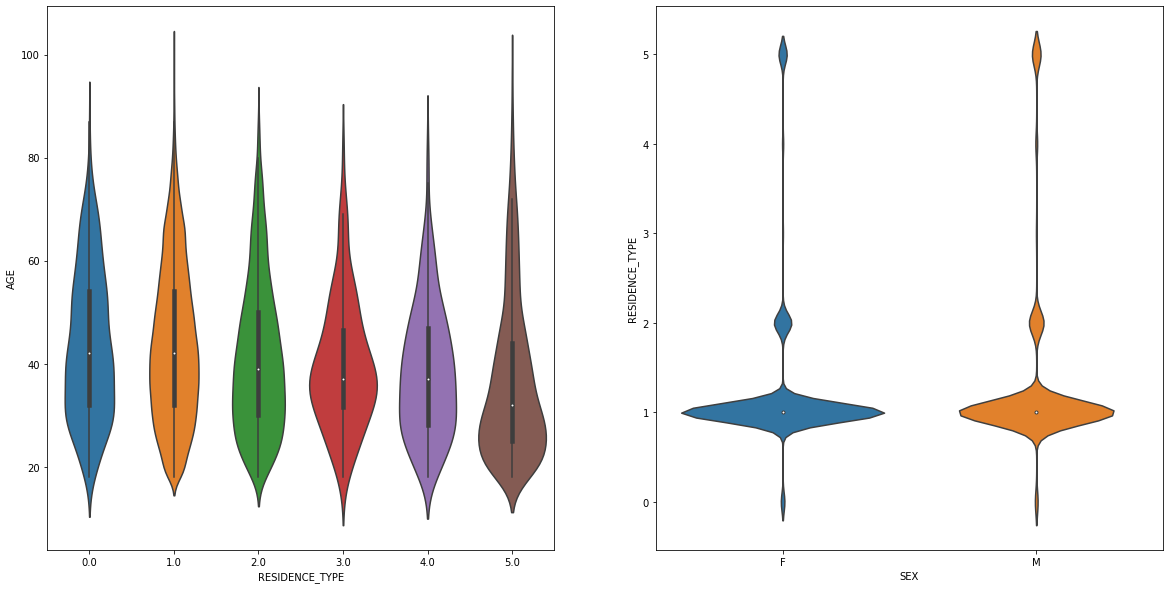

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.violinplot(df.RESIDENCE_TYPE ,df.AGE)
plt.subplot(1,2,2)
sns.violinplot(df.SEX,df.RESIDENCE_TYPE)
plt.show()

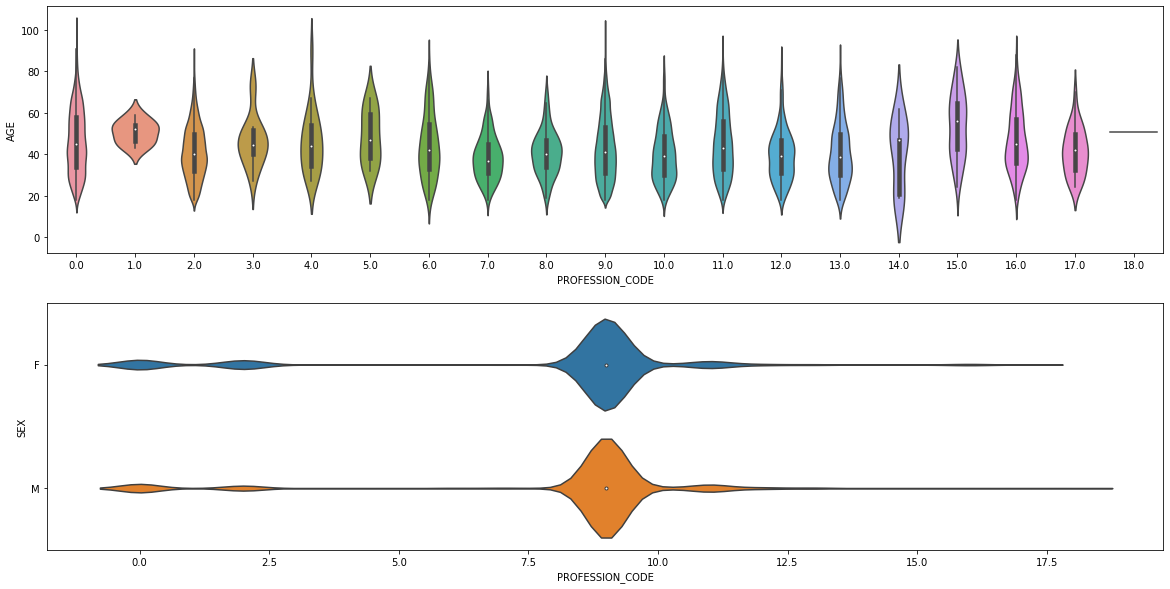

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.violinplot(df.PROFESSION_CODE ,df.AGE)
plt.subplot(2,1,2)
sns.violinplot(df.PROFESSION_CODE ,df.SEX)
plt.show()

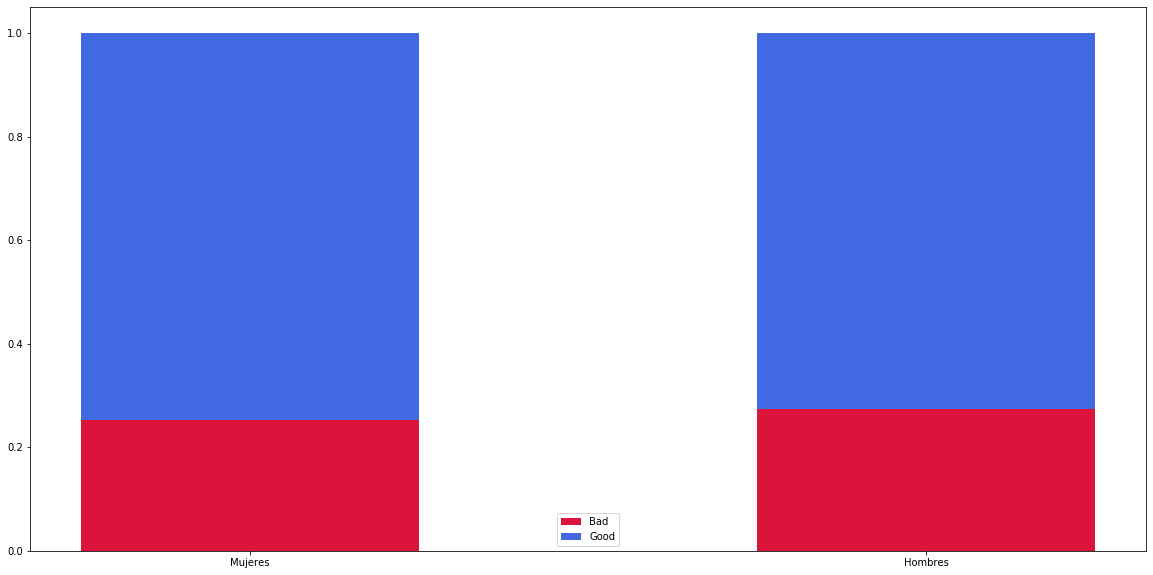

In [18]:
mujeres=df[df['SEX']=='F']['TARGET_LABEL_BAD=1'].value_counts(normalize=True).values
hombres=df[df['SEX']=='M']['TARGET_LABEL_BAD=1'].value_counts(normalize=True).values
fig, ax = plt.subplots(figsize=(20,10))
etiquetas=['Mujeres','Hombres']
x = np.arange(len(etiquetas))  # the label locations
ancho=0.5
plt.bar(etiquetas,[mujeres[1],hombres[1]], ancho, color='crimson')
plt.bar(etiquetas,[mujeres[0],hombres[0]] , ancho ,color='royalblue', bottom=[mujeres[1],hombres[1]])
plt.legend(['Bad','Good'])
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
plt.show()


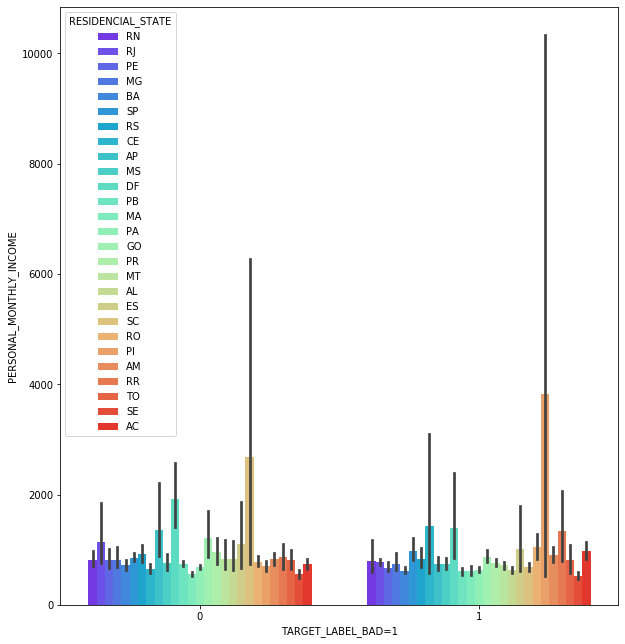

In [19]:
fig, ax = plt.subplots(figsize=(10,11))
sns.barplot(x="TARGET_LABEL_BAD=1", y="PERSONAL_MONTHLY_INCOME", hue="RESIDENCIAL_STATE", data=df, palette="rainbow")
plt.show()

### Ploteo Mastercard

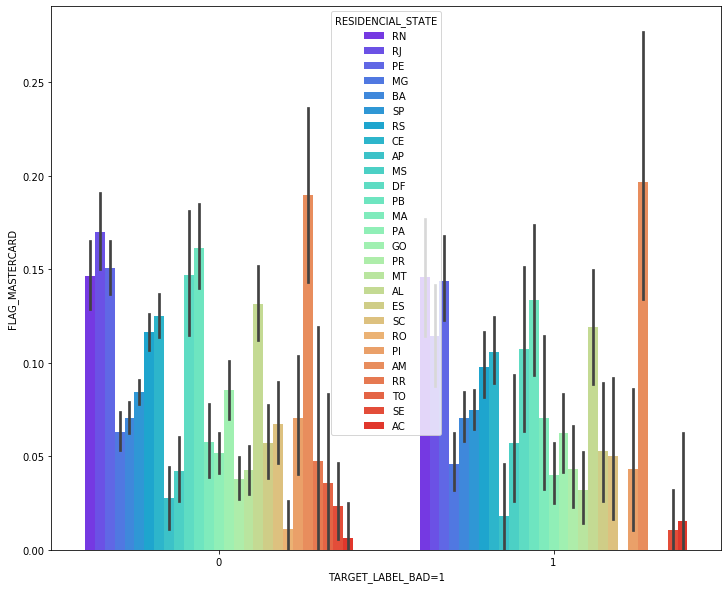

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x="TARGET_LABEL_BAD=1", y="FLAG_MASTERCARD", hue="RESIDENCIAL_STATE", data=df, palette="rainbow")
plt.show()

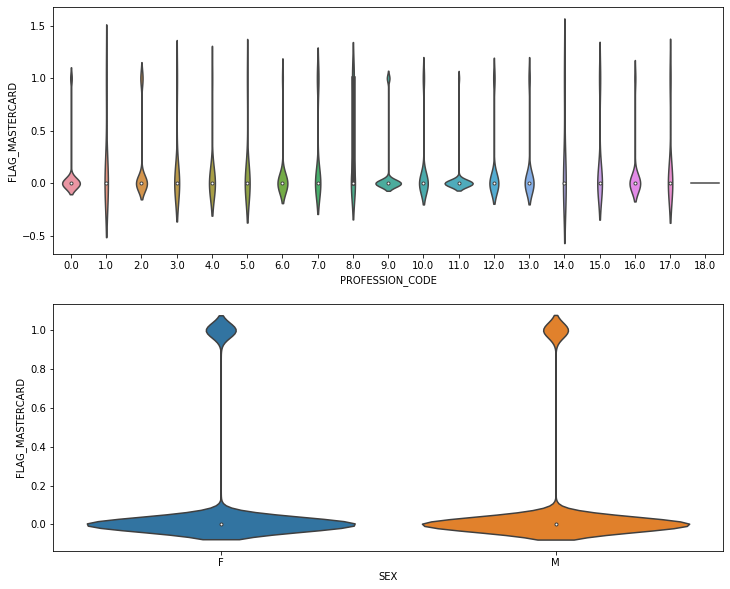

In [24]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.violinplot(df.PROFESSION_CODE,df.FLAG_MASTERCARD)
plt.subplot(2,1,2)
sns.violinplot(df.SEX,df.FLAG_MASTERCARD)


plt.show()

### Ploteo Dinners

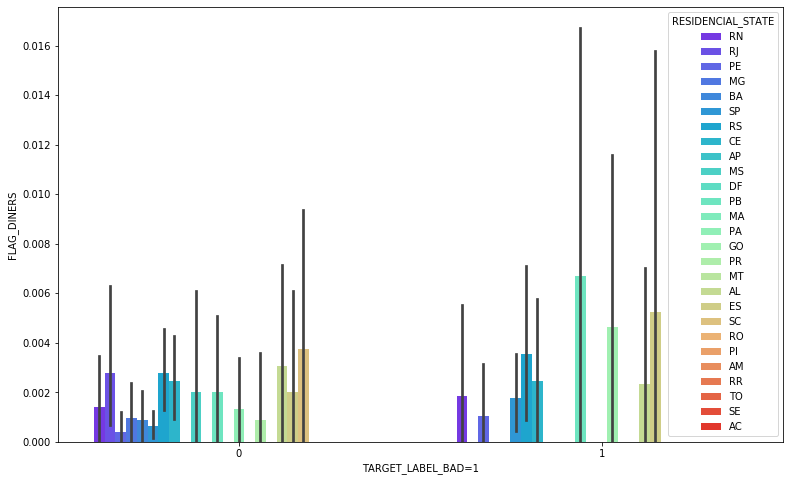

In [22]:
fig, ax = plt.subplots(figsize=(13,8))
sns.barplot(x="TARGET_LABEL_BAD=1", y="FLAG_DINERS", hue="RESIDENCIAL_STATE", data=df, palette="rainbow")
plt.show()

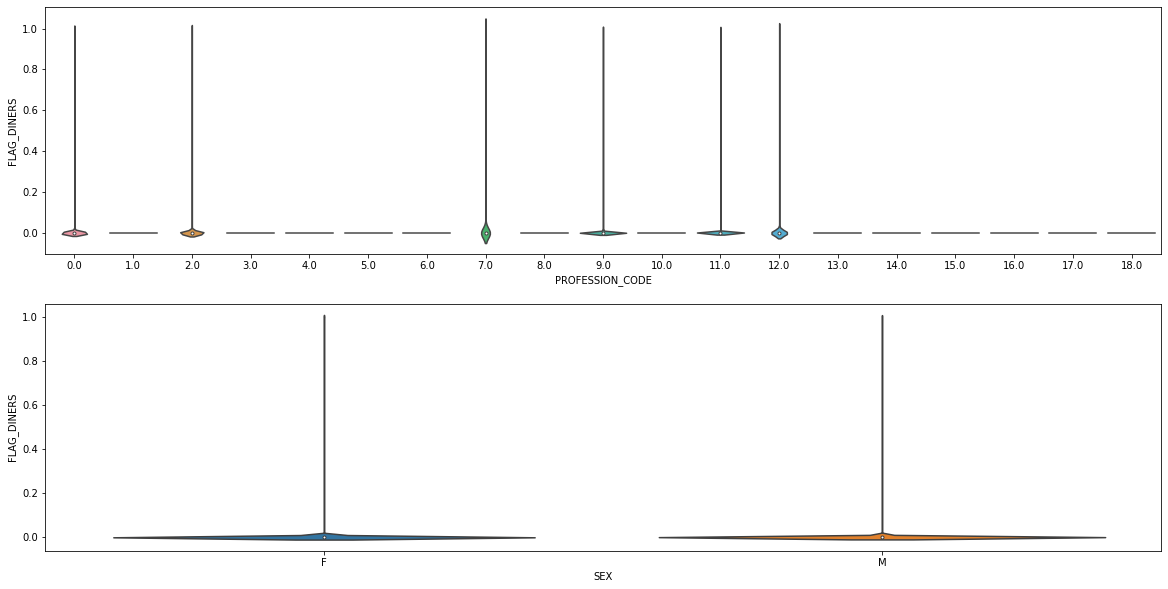

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.violinplot(df.PROFESSION_CODE,df.FLAG_DINERS)
plt.subplot(2,1,2)
sns.violinplot(df.SEX,df.FLAG_DINERS)
plt.show()

### Ploteo Visa

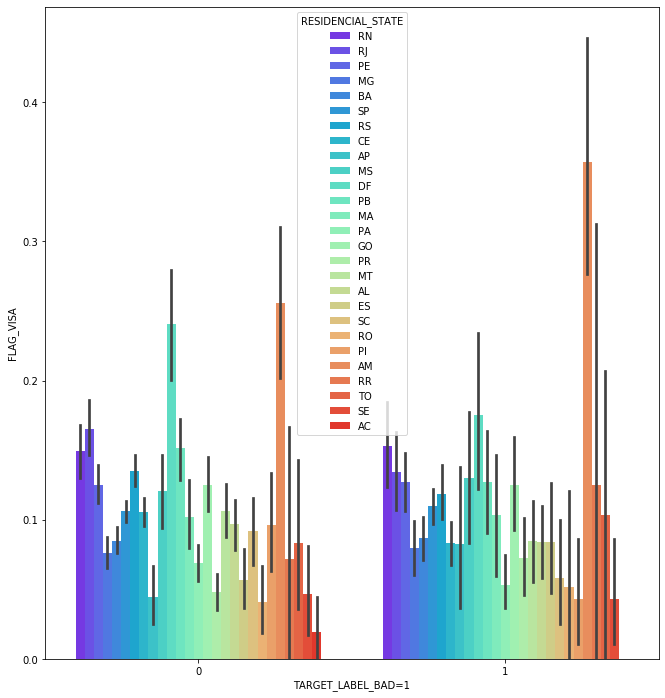

In [23]:
fig, ax = plt.subplots(figsize=(11,12))
sns.barplot(x="TARGET_LABEL_BAD=1", y="FLAG_VISA", hue="RESIDENCIAL_STATE", data=df, palette="rainbow")
plt.show()

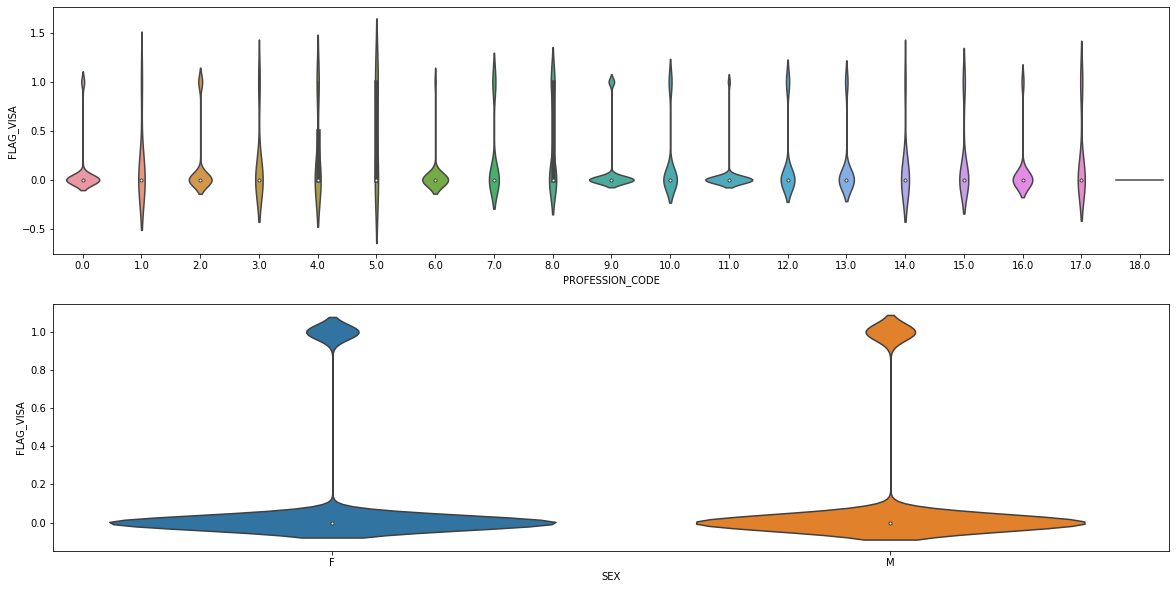

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.violinplot(df.PROFESSION_CODE,df.FLAG_VISA)
plt.subplot(2,1,2)
sns.violinplot(df.SEX,df.FLAG_VISA)
plt.show()

### Ploteo American Express

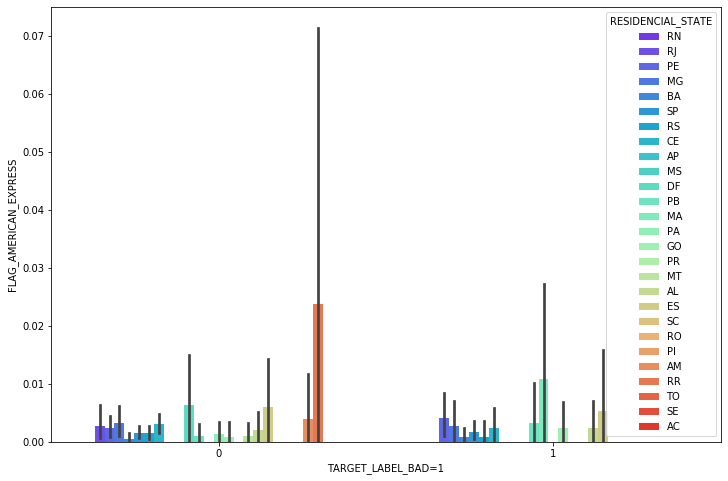

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="TARGET_LABEL_BAD=1", y="FLAG_AMERICAN_EXPRESS", hue="RESIDENCIAL_STATE", data=df, palette="rainbow")
plt.show()

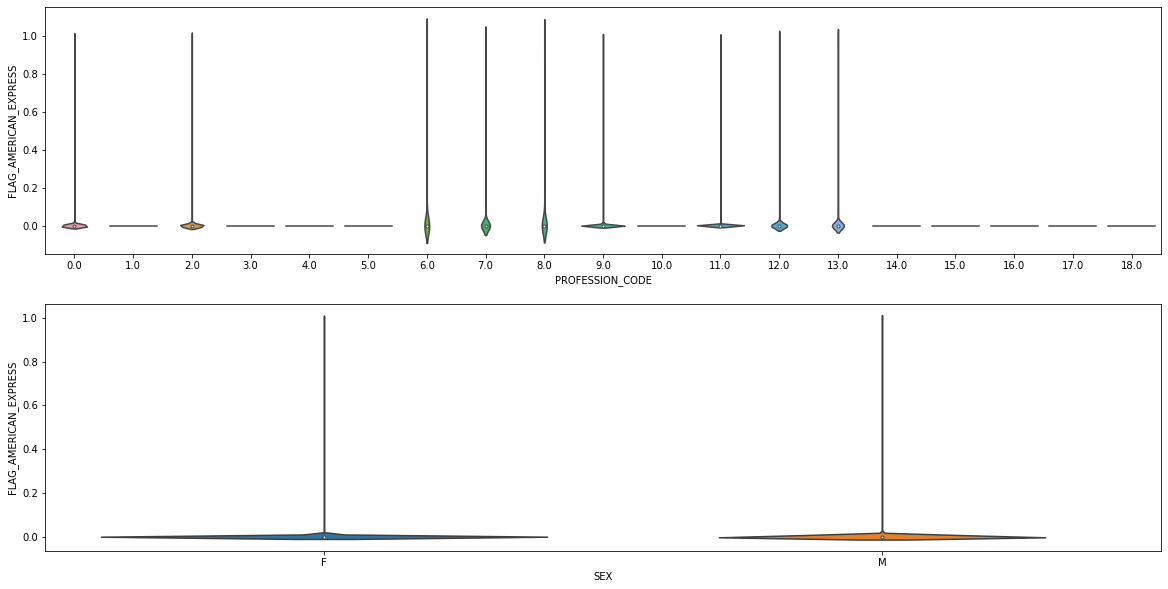

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.violinplot(df.PROFESSION_CODE,df.FLAG_AMERICAN_EXPRESS)
plt.subplot(2,1,2)
sns.violinplot(df.SEX,df.FLAG_AMERICAN_EXPRESS)
plt.show()

### Ploteo Otras tarjetas

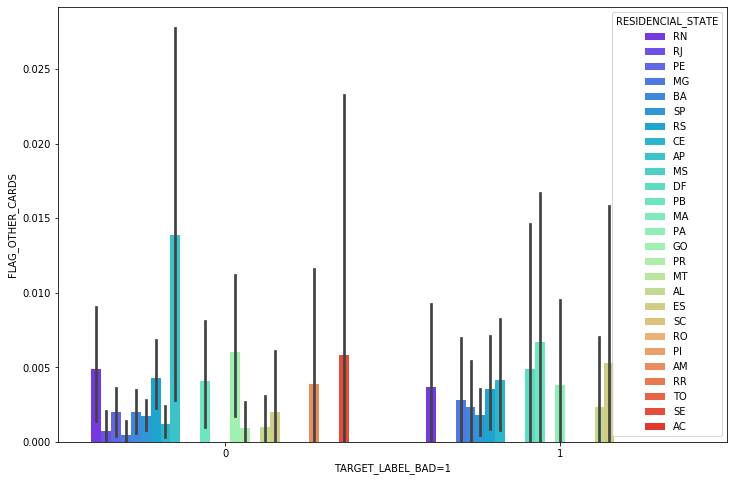

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="TARGET_LABEL_BAD=1", y="FLAG_OTHER_CARDS", hue="RESIDENCIAL_STATE", data=df, palette="rainbow")
plt.show()

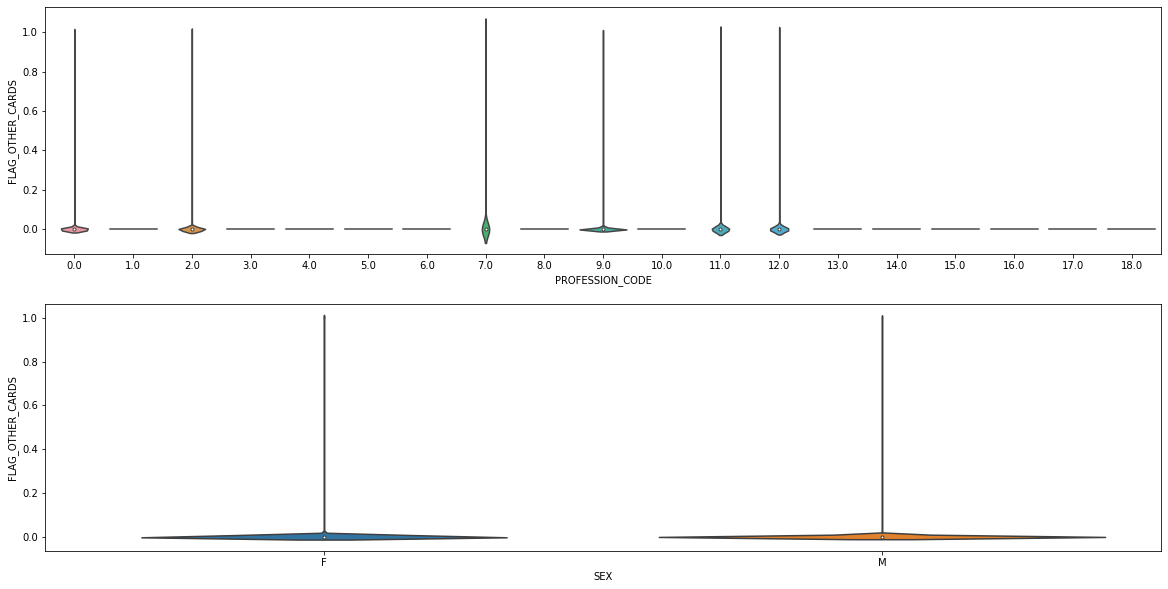

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.violinplot(df.PROFESSION_CODE,df.FLAG_OTHER_CARDS)
plt.subplot(2,1,2)
sns.violinplot(df.SEX,df.FLAG_OTHER_CARDS)
plt.show()

## Modelización

In [29]:
from sklearn.preprocessing import MinMaxScaler
df['PERSONAL_MONTHLY_INCOME'] = MinMaxScaler().fit_transform(df[['PERSONAL_MONTHLY_INCOME']])
df['OTHER_INCOMES'] = MinMaxScaler().fit_transform(df[['OTHER_INCOMES']])
df['PERSONAL_ASSETS_VALUE'] = MinMaxScaler().fit_transform(df[['PERSONAL_ASSETS_VALUE']])
df['QUANT_DEPENDANTS'] = MinMaxScaler().fit_transform(df[['QUANT_DEPENDANTS']])
df['MONTHS_IN_RESIDENCE'] = MinMaxScaler().fit_transform(df[['MONTHS_IN_RESIDENCE']])
df['MONTHS_IN_THE_JOB'] = MinMaxScaler().fit_transform(df[['MONTHS_IN_THE_JOB']])
df['AGE'] = MinMaxScaler().fit_transform(df[['AGE']])

In [30]:
for i in df[['CLERK_TYPE','PAYMENT_DAY','APPLICATION_SUBMISSION_TYPE','STATE_OF_BIRTH','CITY_OF_BIRTH','RESIDENCIAL_STATE','RESIDENCIAL_CITY','RESIDENCIAL_BOROUGH','FLAG_RESIDENCIAL_PHONE','COMPANY','FLAG_PROFESSIONAL_PHONE','PRODUCT','RESIDENCIAL_ZIP_3','PROFESSIONAL_ZIP_3','SEX']]:
    keys=df[i].unique()
    values=range(len(keys))
    dictionary=dict(zip(keys,values))
    df[i]=df[i].replace(dictionary)

In [31]:
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,STATE_OF_BIRTH,CITY_OF_BIRTH,...,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,0,0,0,1,0,6,0.066667,0,0,...,0,0,0.0,9.0,4.0,0,0.168675,0,0,1
1,2,0,1,1,1,0,2,0.000000,1,1,...,1,0,0.0,11.0,4.0,0,0.192771,1,1,1
2,3,0,0,0,1,0,2,0.000000,0,2,...,0,0,0.0,11.0,2.0,0,0.108434,2,2,0
3,4,0,2,0,1,0,2,0.000000,2,3,...,0,0,0.0,9.0,2.0,0,0.518072,3,3,0
4,5,0,3,0,1,1,2,0.000000,1,1,...,0,0,0.0,9.0,5.0,0,0.361446,4,4,1


### Variables del modelo

In [32]:
X=df.iloc[:,:-1].values
y=df['TARGET_LABEL_BAD=1'].values

### Feature Importances

Feature ranking:
1. feature 35 (0.072022)
2. feature 0 (0.062109)
3. feature 13 (0.060170)
4. feature 18 (0.059414)
5. feature 9 (0.058550)
6. feature 16 (0.056466)
7. feature 12 (0.055524)
8. feature 37 (0.054577)
9. feature 36 (0.054526)
10. feature 8 (0.051230)
11. feature 11 (0.050164)
12. feature 2 (0.046742)
13. feature 7 (0.037793)
14. feature 6 (0.036128)
15. feature 33 (0.030225)
16. feature 32 (0.027163)
17. feature 15 (0.023753)
18. feature 34 (0.019683)
19. feature 29 (0.017177)
20. feature 5 (0.013534)
21. feature 19 (0.013227)
22. feature 3 (0.012977)
23. feature 20 (0.012558)
24. feature 30 (0.012177)
25. feature 27 (0.011541)
26. feature 14 (0.010475)
27. feature 17 (0.009532)
28. feature 21 (0.008222)
29. feature 28 (0.006709)
30. feature 25 (0.005370)
31. feature 26 (0.005328)
32. feature 4 (0.002229)
33. feature 24 (0.000951)
34. feature 31 (0.000601)
35. feature 23 (0.000595)
36. feature 22 (0.000555)
37. feature 10 (0.000001)
38. feature 1 (0.000000)


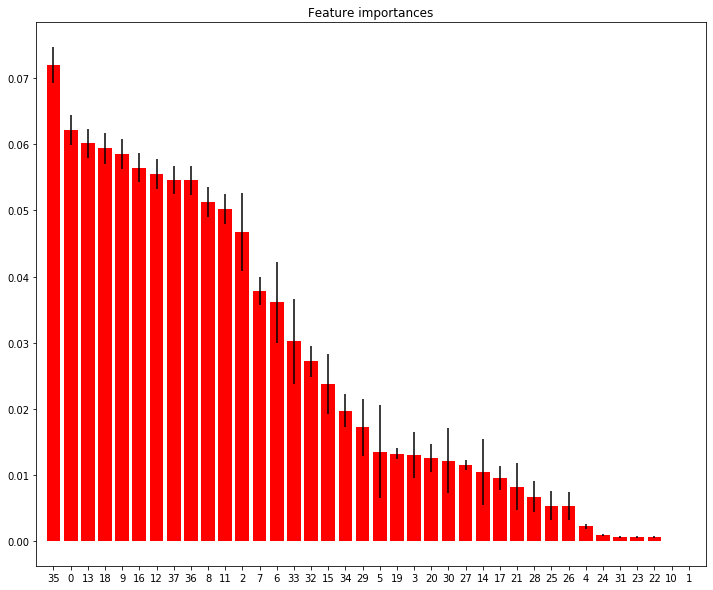

In [33]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Corte de feature importances en la columna numero 2

In [34]:
dfc2=df.copy()

In [35]:
lista_d=7,6,33,32,15,34,29,5,19,3,20,30,27,14,17,21,28,25,26,4,24,31,23,22,10,1

In [36]:
dfc2.drop(dfc2.columns[[lista_d]],axis=1,inplace=True)

/Users/ismaelgarciainigo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [37]:
dfc2.shape

(47750, 13)

## Corte Feature importances en la columna número 34

In [38]:
dfc34=df.copy()

In [39]:
listadd=29,5,19,3,20,30,27,14,17,21,28,25,26,4,24,31,23,22,10,1

In [40]:
dfc34.drop(dfc34.columns[[listadd]],axis=1,inplace=True)

In [41]:
dfc34.shape

(47750, 19)

## Ajustamos el desbalance de clase con Oversampling

### Oversampling con SMOTE

In [42]:
X=df.iloc[:,:-1].values
y=df['TARGET_LABEL_BAD=1'].values
Counter(y)

Counter({1: 12446, 0: 35304})

In [43]:
X_resampled1, y_resampled1 = SMOTE().fit_resample(X, y)

In [44]:
Counter(y_resampled1)

Counter({1: 35304, 0: 35304})

## Random Forest

In [45]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled1)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled1):
    X_train, X_test = X_resampled1[train_index], X_resampled1[test_index]
    y_train, y_test = y_resampled1[train_index], y_resampled1[test_index]
    
    clasificador = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print("Accuracy: ", accuracy_score(yhat,lista_y))
print(classification_report(lista_y,yhat,digits=3))

Accuracy:  0.7376642873328801
              precision    recall  f1-score   support

           0      0.748     0.717     0.732     35304
           1      0.728     0.758     0.743     35304

    accuracy                          0.738     70608
   macro avg      0.738     0.738     0.738     70608
weighted avg      0.738     0.738     0.738     70608



## Xgboost

In [46]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled1)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled1):
    X_train, X_test = X_resampled1[train_index], X_resampled1[test_index]
    y_train, y_test = y_resampled1[train_index], y_resampled1[test_index]
    
    clasificador = XGBClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print("Accuracy: ", accuracy_score(yhat,lista_y))
print(classification_report(lista_y,yhat,digits=3))

Accuracy:  0.7347609336052572
              precision    recall  f1-score   support

           0      0.736     0.732     0.734     35304
           1      0.734     0.737     0.735     35304

    accuracy                          0.735     70608
   macro avg      0.735     0.735     0.735     70608
weighted avg      0.735     0.735     0.735     70608



In [47]:
clasificador.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

## Adaboost

In [48]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_resampled1)
yhat=[]
lista_y = []
for train_index, test_index in kf.split(X_resampled1):
    X_train, X_test = X_resampled1[train_index], X_resampled1[test_index]
    y_train, y_test = y_resampled1[train_index], y_resampled1[test_index]
    
    clasificador = AdaBoostClassifier()
    clasificador.fit(X_train, y_train)
    yhat1 = clasificador.predict(X_test)
    yhat.extend(yhat1)
    lista_y.extend(y_test)
print("Accuracy: ", accuracy_score(yhat,lista_y))
print(classification_report(lista_y,yhat,digits=3))

Accuracy:  0.7152022433718559
              precision    recall  f1-score   support

           0      0.729     0.684     0.706     35304
           1      0.703     0.746     0.724     35304

    accuracy                          0.715     70608
   macro avg      0.716     0.715     0.715     70608
weighted avg      0.716     0.715     0.715     70608



In [49]:
clf0=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              random_state=None, verbose=0,
                                              warm_start=False)
clf1= XGBClassifier()
clf2= AdaBoostClassifier()

In [50]:
from sklearn.ensemble import VotingClassifier
clf=VotingClassifier(estimators=[('rf',clf0),('XGB',clf1),('ADaB',clf2)],voting='hard', weights=[1,1,1], n_jobs=-1)

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

print(cross_val_score(clf, X_resampled1, y_resampled1, cv=10, scoring = make_scorer(f1_score)).mean())

0.4870344991916083
